In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.

import os
from matplotlib import rcParams

print(os.listdir("../parth/Desktop/google-play-store-apps"))

['googleplaystore.csv', 'googleplaystore_user_reviews.csv', 'license.txt']


In [2]:
data = pd.read_csv('../parth/Desktop/google-play-store-apps/googleplaystore.csv')
data2 = pd.read_csv('../parth/Desktop/google-play-store-apps/googleplaystore_user_reviews.csv')

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
print("Shape of the dataframe is",data.shape)
print("The number of nulls in each column are \n", data.isna().sum())

Shape of the dataframe is (10841, 13)
The number of nulls in each column are 
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [4]:
print("Percentage null or na values in df")
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)

Percentage null or na values in df


App                0.00
Category           0.00
Rating            13.60
Reviews            0.00
Size               0.00
Installs           0.00
Type               0.01
Price              0.00
Content Rating     0.01
Genres             0.00
Last Updated       0.00
Current Ver        0.07
Android Ver        0.03
dtype: float64

In [5]:
df=data
df.Installs = df.Installs.replace("Free", np.nan)
df.dropna(how ='any', inplace = True)
df.Installs = df.Installs.astype(str)
df.Installs = df.Installs.apply(lambda x: x.replace(',',''))
df.Installs = df.Installs.apply(lambda x: x.replace('+',''))
df.Installs = df.Installs.apply(lambda x: int(x))
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df['Size'].replace('Varies with device', np.nan, inplace = True ) 
df.Size = (df.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
df.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
df.Size = df.Size.apply(lambda x: x/(10**6))
df.rename(columns={'Size': 'Size(in MB)'}, inplace=True)
# df.Size.unique()
# df.head()
df.Category = df.Category.apply(lambda x: x.replace('_',' '))
df.Price = df.Price.apply(lambda x: x.replace('$',''))
df.rename(columns={'Price': 'Price(in $)'}, inplace=True)

# Data Visualization

Text(0.5, 1.0, 'TOTAL apps in each category')

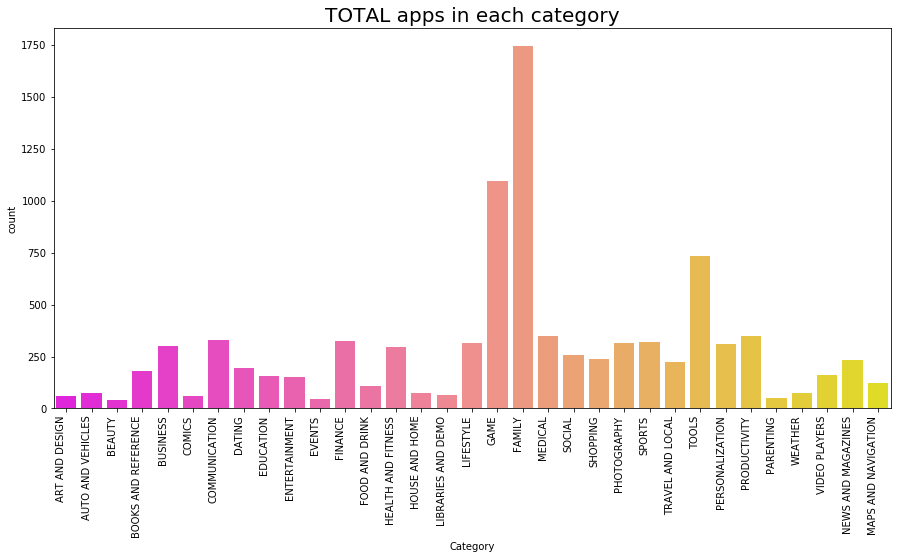

In [7]:
rcParams['figure.figsize'] = 15,7
category_plot = sns.countplot(x="Category",data=df, palette = "spring")
category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=90, ha="right")
category_plot 
plt.title('TOTAL apps in each category',size = 20)

**Family,Game and Tools** are the most downloaded categories.


Text(0.5, 1.0, 'Content Rating distribution')

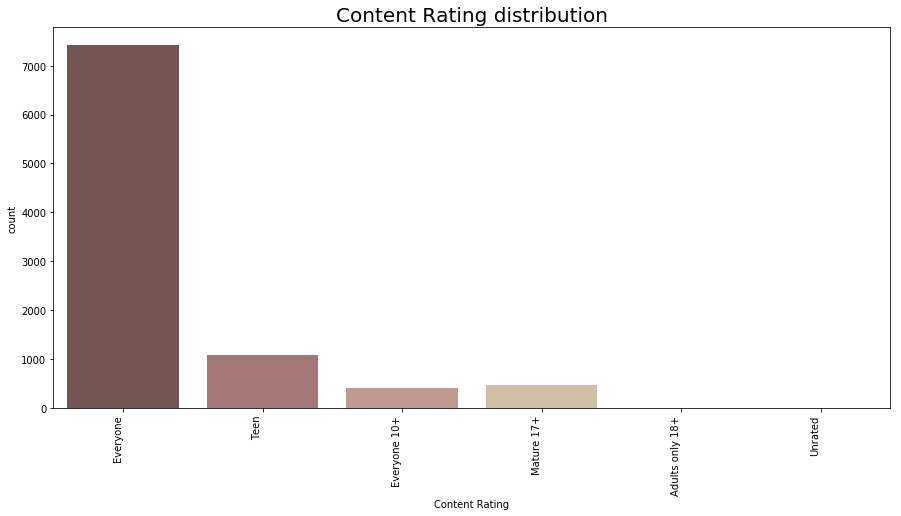

In [8]:
rcParams['figure.figsize'] = 15,7
content_plot = sns.countplot(x="Content Rating",data=df, palette = "pink")
content_plot.set_xticklabels(content_plot.get_xticklabels(), rotation=90, ha="right")
content_plot 
plt.title('Content Rating distribution',size = 20)

* **Everyone , Teen** constitute the majority Content Rating of all the apps.
* **Unrated and Adults ony 18+** have count less then 10.

Text(0.5, 1.0, 'Number of Free Apps vs Paid Apps')

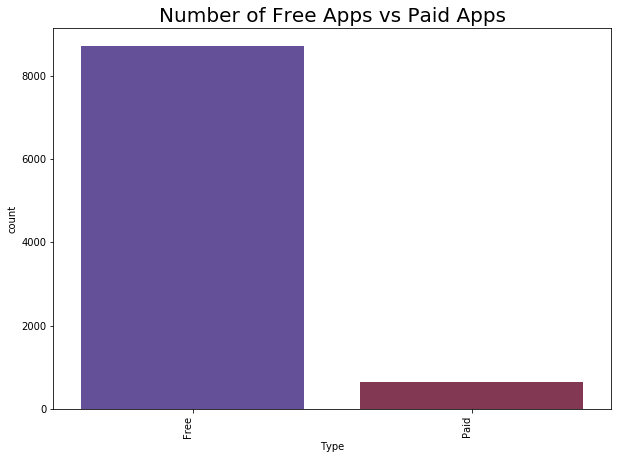

In [9]:
rcParams['figure.figsize'] = 10,7
type_plot = sns.countplot(x="Type", data=df, palette = "twilight")
type_plot.set_xticklabels(type_plot.get_xticklabels(), rotation=90, ha="right")
type_plot 
plt.title('Number of Free Apps vs Paid Apps',size = 20)

* The number of **FREE APPS**=7588
* The number of **PAID APPS**=602

Most of the Apps in the App Store are **Free apps**.We will visualize both the Types in detail later in the kernel.

Text(0.5, 1.0, 'Size Range for free and paid Apps')

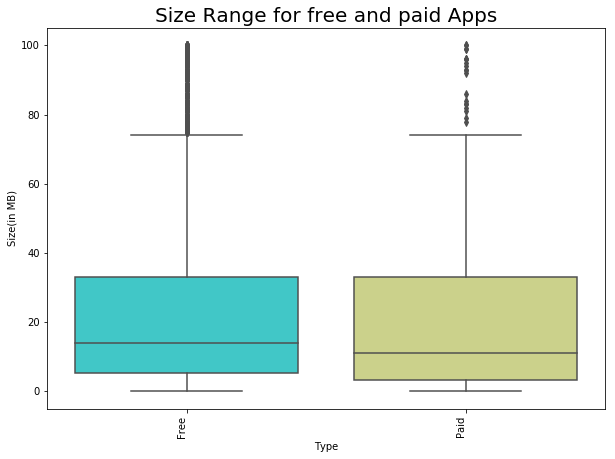

In [10]:
rcParams['figure.figsize'] = 10,7
type_size = sns.boxplot(x="Type",y="Size(in MB)", data=df, palette = "rainbow")
type_size.set_xticklabels(type_size.get_xticklabels(), rotation=90, ha="right")
type_size 
plt.title('Size Range for free and paid Apps',size = 20)

Text(0.5, 1.0, 'Content Rating vs Price')

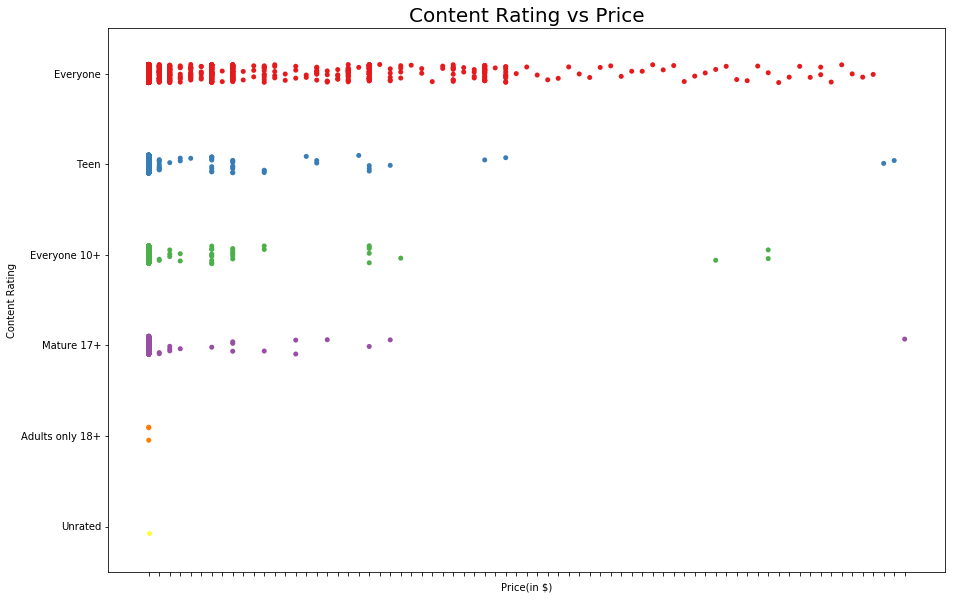

In [11]:
rcParams['figure.figsize'] = 15,10
content_price = sns.stripplot(y="Content Rating",x="Price(in $)", data=df, palette = "Set1")
content_price.set_xticklabels(content_price.get_xticklabels(), rotation=90, ha="right")
content_price 
plt.title('Content Rating vs Price',size = 20)

* Most of the Apps with Content Rating EVERYONE lie below 50 dollars. However there are some apps that lie in the 350-400 dollars bracket!!
* The mature rated apps(10+, 17+, 18+) are mosty free or cheap.

## PRICE DISTRIBUTION

Text(0.5, 1.0, 'Number of apps for every price')

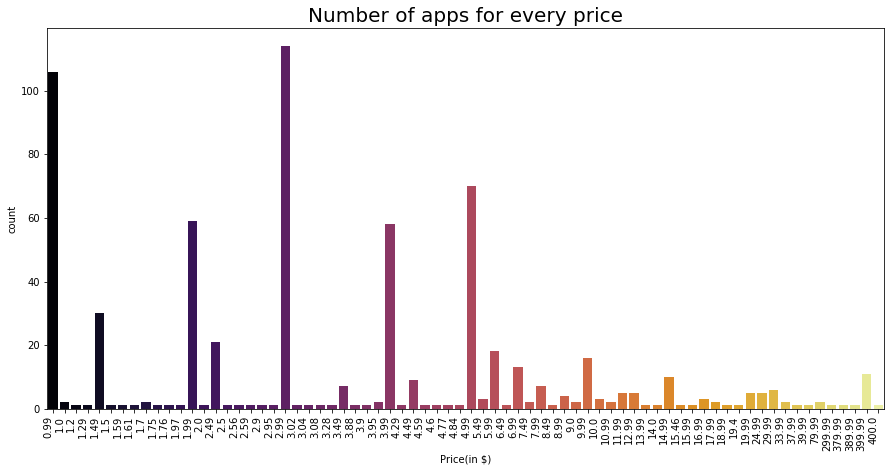

In [12]:
df['Price(in $)'] = df['Price(in $)'].apply(lambda x: float(x))
rcParams['figure.figsize'] = 15,7
priced_apps=df[df['Price(in $)'] != 0.0]
price_plot = sns.countplot(priced_apps['Price(in $)'], palette = "inferno")
price_plot.set_xticklabels(price_plot.get_xticklabels(), rotation=90, ha="right")
price_plot 
plt.title('Number of apps for every price',size = 20)

1. We have filtered only the priced apps from the Price column to see the price distributution of priced apps.
2. Most paid apps are priced **3.02 Dollars** interestingly.
3. Paid apps mostly cost **3.02 dollars, 0.99 dollars ,5.49 dollars ,2.00 dollars or 4.29 dollars**

## INSTALLS DISTRIBUTION

Text(0.5, 1.0, 'Installs count distribution')

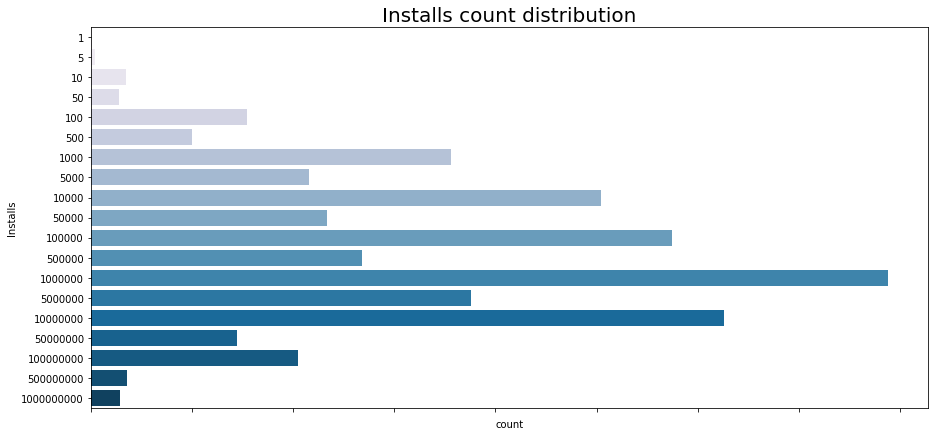

In [13]:
rcParams['figure.figsize'] = 15,7
install_plot = sns.countplot(y="Installs",data=df, palette = "PuBu")
install_plot.set_xticklabels(install_plot.get_xticklabels(), rotation=90, ha="right")
install_plot 
plt.title('Installs count distribution',size = 20)

Most of the apps in the dataframe have **1 million** installs followed by **10 million** and **100k**.

## RATINGS

Text(0.5, 1.0, 'Rating Distribution')

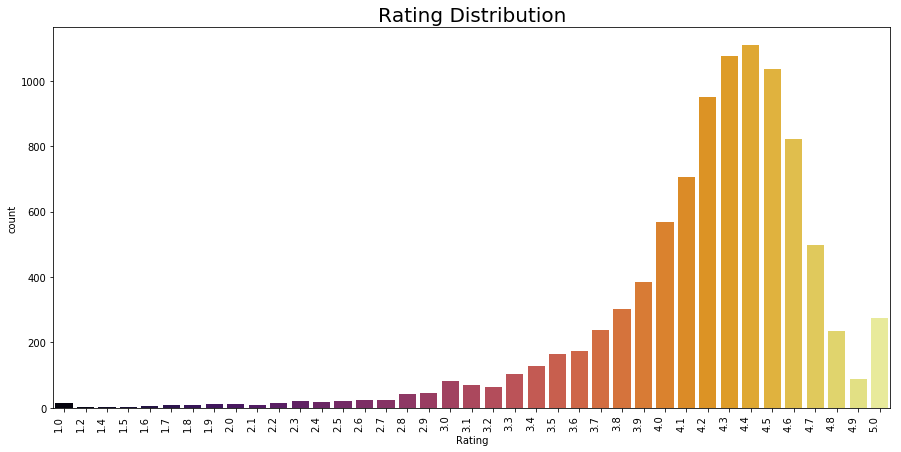

In [14]:
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="Rating",data=df, palette = "inferno")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot 
plt.title('Rating Distribution',size = 20)

1. The Ratings distribution is **left skewed.**
2. Most of the apps are rated **between 4.0 and 4.7.**

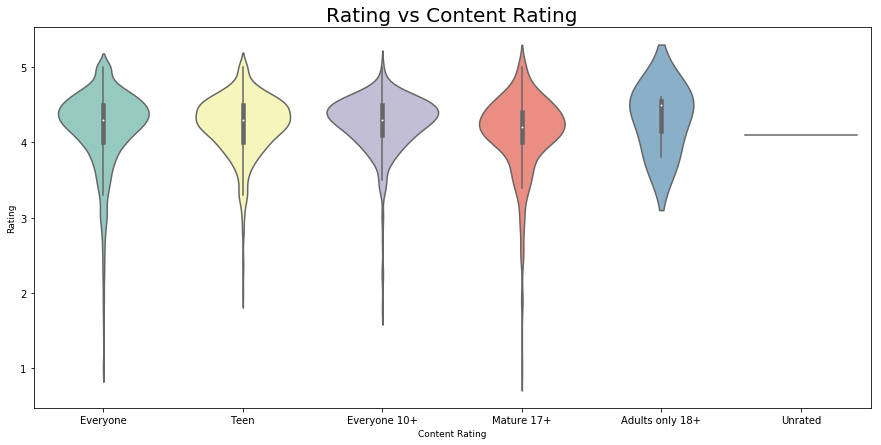

In [15]:
content_ratings = sns.violinplot(x="Content Rating",y="Rating",data=df, kind="box", height = 10 ,palette = "Set3")
content_ratings.set_xlabel(xlabel = 'Content Rating', fontsize = 9)
content_ratings.set_ylabel(ylabel = 'Rating', fontsize = 9)
content_ratings.set_title(label = 'Rating vs Content Rating', fontsize = 20)
plt.show()

# How much do Free Apps and Paid Apps differ?

### Exploring Free Apps

### First step is to get the most installed free apps.

In [16]:
df= df.drop_duplicates(subset='App',keep='first')
df['Installs'] = df['Installs'].apply(lambda x: int(x))
df[['App','Installs','Category','Content Rating','Price(in $)']].head()
newdf=df[['App','Installs','Category','Content Rating','Price(in $)','Reviews','Genres']].groupby(['Installs'], sort = True)
newdf=newdf.filter(lambda x: x['Installs'].mean() >= 1000000000)
newdf=newdf.sort_values(by=['Installs'])
newdf

,App,Installs,Category,Content Rating,Price(in $),Reviews,Genres
152,Google Play Books,1000000000,BOOKS AND REFERENCE,Teen,0.0,1433233,Books & Reference
3665,YouTube,1000000000,VIDEO PLAYERS,Teen,0.0,25655305,Video Players & Editors
3454,Google Drive,1000000000,PRODUCTIVITY,Everyone,0.0,2731171,Productivity
3234,Google,1000000000,TOOLS,Everyone,0.0,8033493,Tools
3127,Google Street View,1000000000,TRAVEL AND LOCAL,Everyone,0.0,2129689,Travel & Local
3117,Maps - Navigate & Explore,1000000000,TRAVEL AND LOCAL,Everyone,0.0,9235155,Travel & Local
2808,Google Photos,1000000000,PHOTOGRAPHY,Everyone,0.0,10858556,Photography
2554,Google+,1000000000,SOCIAL,Teen,0.0,4831125,Social
2545,Instagram,1000000000,SOCIAL,Teen,0.0,66577313,Social
2544,Facebook,1000000000,SOCIAL,Teen,0.0,78158306,Social


### Next step is to visualize the TOP CATEGORIES out of most installed FREE APPS in the dataframe obtained above.

Text(0.5, 1.0, 'Top Categories for Free Apps')

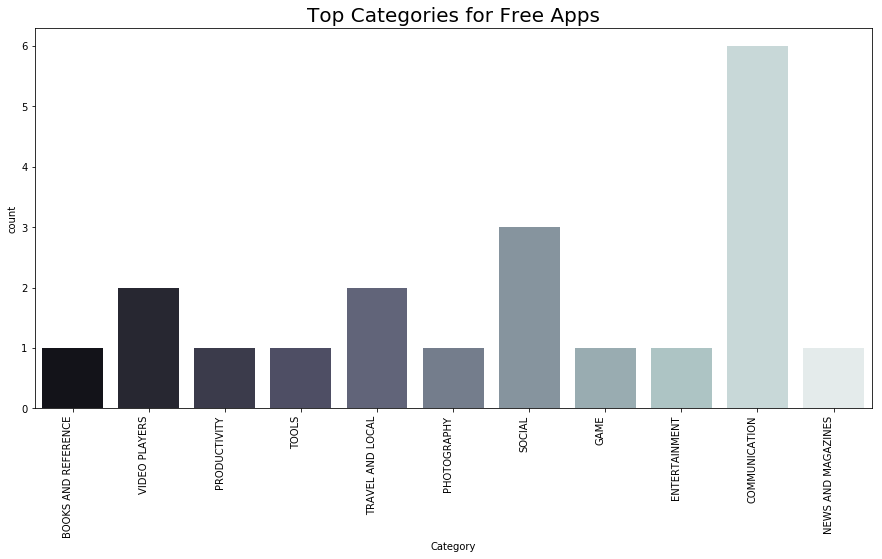

In [17]:
rcParams['figure.figsize'] = 15,7
free_categories = sns.countplot(x="Category",data=newdf, palette = "bone")
free_categories.set_xticklabels(free_categories.get_xticklabels(), rotation=90, ha="right")
free_categories 
plt.title('Top Categories for Free Apps',size = 20)

### Now, lets get the TOP GENRES out of all the highest installed FREE APPS

Text(0.5, 1.0, 'Top Genres for Free Apps')

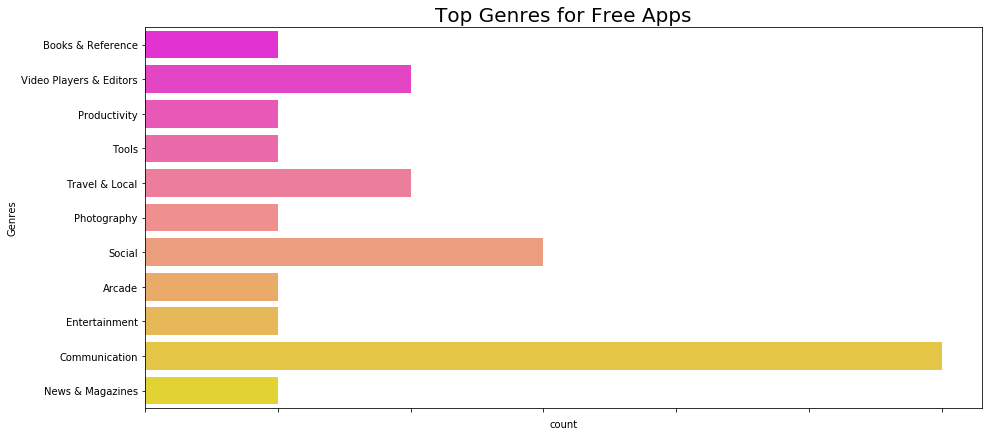

In [18]:
rcParams['figure.figsize'] = 15,7
free_genres = sns.countplot(y="Genres",data=newdf, palette = "spring")
free_genres.set_xticklabels(free_genres.get_xticklabels(), rotation=90, ha="right")
free_genres 
plt.title('Top Genres for Free Apps',size = 20)

## Exploring Paid Apps

### First step is to find the highest installed paid Apps

In [19]:
new=df[['App','Category','Content Rating','Price(in $)','Reviews']].groupby(['Price(in $)'], sort = True)
new=new.filter(lambda x: x['Price(in $)'].mean() != 0)
new=new.sort_values(by=['Price(in $)'])
new
newdf2=df[['App','Installs','Genres']].groupby(['Installs'], sort = True)
newdf2=newdf2.filter(lambda x: x['Installs'].mean() >= 1000000)
newdf2=newdf2.sort_values(by=['Installs'])
newdf2

s1 = pd.merge(new, newdf2, how='inner', on=['App'])
s1

,App,Category,Content Rating,Price(in $),Reviews,Installs,Genres
0,Lost Journey (Dreamsky),GAME,Everyone,0.99,32344,1000000,Adventure
1,League of Stickman 2018- Ninja Arena PVP(Dream...,GAME,Teen,0.99,32496,1000000,Action
2,Stickman Legends: Shadow Wars,GAME,Everyone 10+,0.99,38419,1000000,Action
3,HD Widgets,PERSONALIZATION,Everyone,0.99,58617,1000000,Personalization
4,Hitman Sniper,GAME,Mature 17+,0.99,408292,10000000,Action
5,Cut the Rope GOLD,FAMILY,Everyone,0.99,61264,1000000,Puzzle
6,Fruit Ninja Classic,GAME,Everyone,0.99,85468,1000000,Arcade
7,Infinity Dungeon VIP,FAMILY,Everyone 10+,0.99,21804,1000000,Role Playing
8,Zombie Avengers:(Dreamsky)Stickman War Z,GAME,Teen,0.99,13604,1000000,Action
9,Where's My Water?,FAMILY,Everyone,1.99,188740,1000000,Puzzle;Brain Games


### Next step is to visualize the TOP CATEGORIES out of most installed PAID APPS in the dataframe obtained above.

Text(0.5, 1.0, 'Top Categories for PAID APPS')

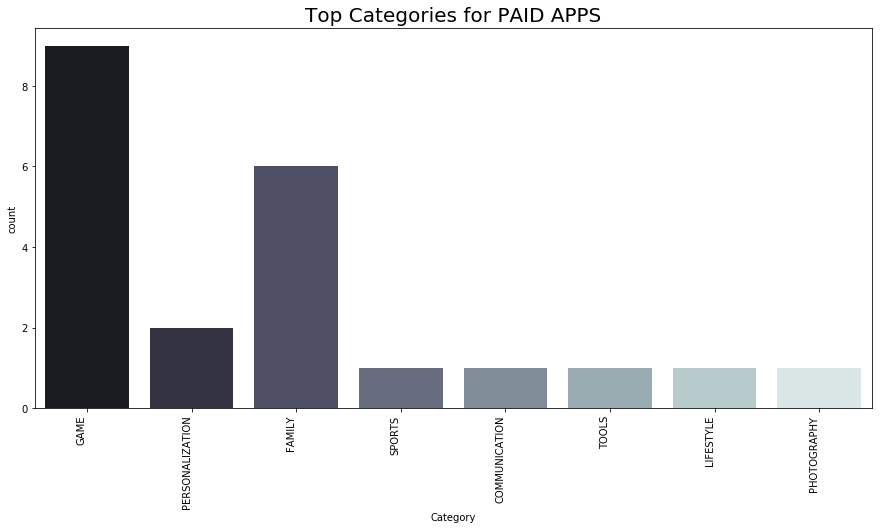

In [20]:
rcParams['figure.figsize'] = 15,7
paid_categories = sns.countplot(x="Category",data=s1, palette = "bone")
paid_categories.set_xticklabels(paid_categories.get_xticklabels(), rotation=90, ha="right")
paid_categories 
plt.title('Top Categories for PAID APPS',size = 20)

### Now, lets get the TOP GENRES out of all the highest installed PAID APPS

Text(0.5, 1.0, 'Top Genres for PAID APPS')

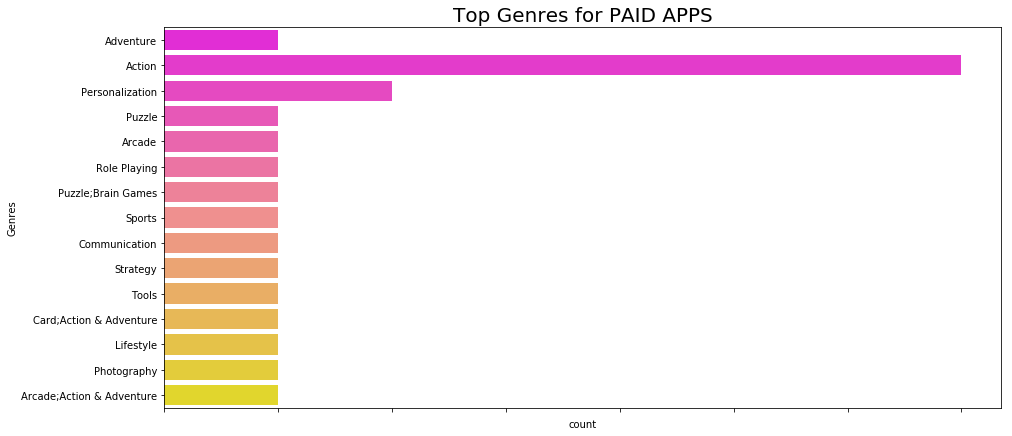

In [21]:
rcParams['figure.figsize'] = 15,7
paid_genres = sns.countplot(y="Genres",data=s1, palette = "spring")
paid_genres.set_xticklabels(paid_genres.get_xticklabels(), rotation=90, ha="right")
paid_genres 
plt.title('Top Genres for PAID APPS',size = 20)

## Summary for Free vs Paid Apps:-

1. **People tend to spend their money on games and Personalization but when it comes to Social Networking and Communication they tend to install the free Apps on the Android Store**.
1.  The **2 most installed Paid Apps** are both **games(Minecraft and Hitman:Sniper)**
1.  The majority of most installed **free** Apps lie in the **Communication** Category.
1.  The majority of most installed **Paid** Apps lie in the **Gaming** Category.
1. The **Content Rating** for Free apps is mostly for Everyone or Teen , but for Paid Apps 6 out of 22 apps are not for users under 10 years of age.

# Is there a relation between the Android Update Dates of all the Apps?

Text(0.5, 1.0, 'Time series plot of Last Updates')

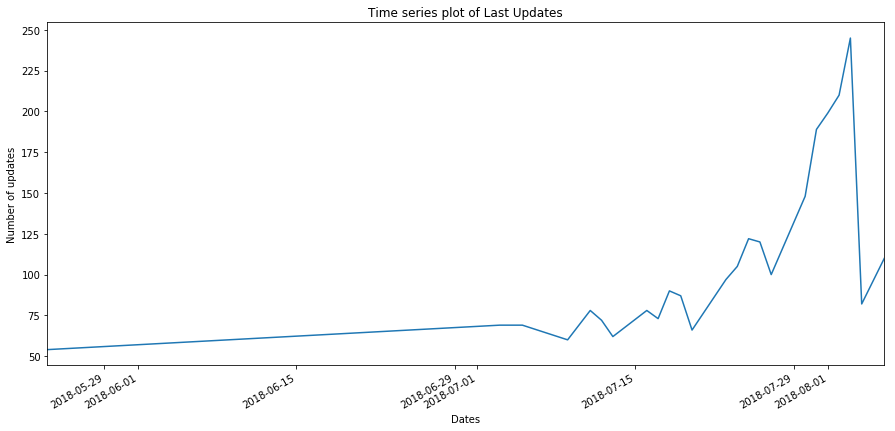

In [22]:
df['new'] = pd.to_datetime(df['Last Updated'])
df.drop(labels = ['Last Updated'], axis = 1, inplace = True)
df.rename(columns={'new': 'Last Updated'}, inplace=True)
freq= pd.Series()
freq=df['Last Updated'].value_counts()
newfreq=freq[freq>50]
newfreq.plot()
plt.xlabel("Dates")
plt.ylabel("Number of updates")
plt.title("Time series plot of Last Updates")

* I have filtered and selected the dates on which most number of Apps were last updated.
* The above plot shows that between **July 15,2018** and **August 1,2018** majority of the Apps were updated as is clear by the upward trend in the graph above.

# Which are the best Apps on App Store?

### The criteria I have selected are:
1. High **rating**
1. Large number of **reviews**
1. Large number of **installs**


* I haven't taken **Price** as a parameter for this selection because I believe an expensive app can be perceived to be better than a similar free app if it has high rating,reviews and installs.
* I think features like **Content Rating, Android Version, Last Update time, Size of the App, Current version of the App** are irrelevant in this selection as well for obvious reasons.

In [23]:
df['Rating'] = df['Rating'].apply(lambda x: float(x))
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

newdf_rate=df[['App','Rating','Category','Content Rating']].groupby(['Rating'], sort = True)
newdf_rate=newdf_rate.filter(lambda x: x['Rating'].mean() >= 4.5)
newdf_rate=newdf_rate.sort_values(by=['Rating'])

newdf_reviews=df[['App','Reviews']].groupby(['Reviews'], sort = True)
newdf_reviews=newdf_reviews.filter(lambda x: x['Reviews'].mean() >= 255435)
newdf_reviews=newdf_reviews.sort_values(by=['Reviews'])

newdf_installs=df[['App','Installs']].groupby(['Installs'], sort = True)
newdf_installs=newdf_installs.filter(lambda x: x['Installs'].mean() >= 10000000)
newdf_installs=newdf_installs.sort_values(by=['Installs'])

s1 = pd.merge(newdf_reviews, newdf_rate, how='inner', on=['App'])
s2 = pd.merge(s1, newdf_installs, how='inner', on=['App'])
s2

,App,Reviews,Rating,Category,Content Rating,Installs
0,TRANSFORMERS: Earth Wars,256219,4.5,FAMILY,Everyone,10000000
1,Pocket,256680,4.5,NEWS AND MAGAZINES,Everyone,10000000
2,Video Player All Format,259003,4.8,VIDEO PLAYERS,Everyone,10000000
3,LightX Photo Editor & Photo Effects,259450,4.7,PHOTOGRAPHY,Everyone,10000000
4,Hotels.com: Book Hotel Rooms & Find Vacation D...,260121,4.5,TRAVEL AND LOCAL,Everyone,10000000
5,Geometry Dash SubZero,260527,4.6,GAME,Everyone,10000000
6,Rush,260651,4.6,GAME,Everyone,10000000
7,CM Security Lite - Antivirus,262076,4.6,TOOLS,Everyone,10000000
8,Build a Bridge!,263454,4.6,FAMILY,Everyone,10000000
9,Agoda – Hotel Booking Deals,263525,4.6,TRAVEL AND LOCAL,Everyone,10000000


As you can see only **359** apps make it to this list from all categories.The apps you see in this list are well known and famous and best in their respective category.
To name a few, apps like **Google Photos, Instagram, Subway surfers,Clash of Clans, Shareit, Dictionary** etc are part of this list.


 # Which Category has more likeable Apps?

**I think an App which has large number of reviews , high rating on App store and large number of installs can be deemed to be likeable for any new user * i.e * *any new user is more likely to like the App experience if these criteria are met.***

*From the dataframe obtained above we'll plot and see which categories make up most of the likeable apps.*

Text(0.5, 1.0, 'CATEGORIES OF MOST LIKEABLE APPS ON THE ANDROID APP STORE')

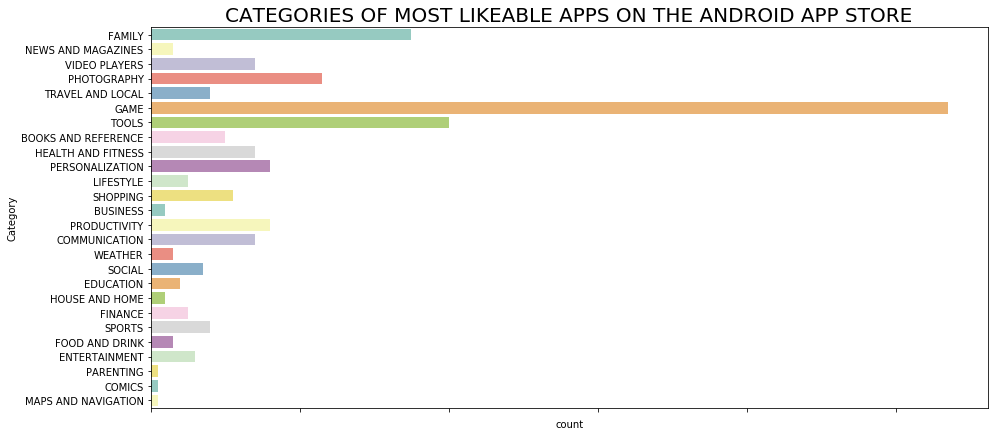

In [24]:
rcParams['figure.figsize'] = 15,7
likeable_apps = sns.countplot(y="Category",data=s2, palette = "Set3")
likeable_apps.set_xticklabels(likeable_apps.get_xticklabels(), rotation=90, ha="right")
likeable_apps 
plt.title('CATEGORIES OF MOST LIKEABLE APPS ON THE ANDROID APP STORE',size = 20)

 **Gaming Apps** outruns other categories by huge margin in the criteria of our most LIKEABLE category.

**Does this mean people tend to give reviews and ratings whenever they play a game?** I think yes! **The graph above suggests that you are more likely to give a rating or review for a gaming app then any other app.** Games like **Subway surfer,8ballpool, Clash royale, Clash of Clans** have millions of reviews,high rating and millions of installs.

Please note that Communication Apps like **Instagram** etc individually have more number of installs, reviews and higher rating but more Gaming Apps make it to this list than Communication Apps as is evident by the plot above.